In [144]:
#using Pkg
#Pkg.add(PackageSpec(name="JWAS",rev="master"))
#Pkg.add("RecipesBase")
#using RecipesBase

In [ ]:
#methods(add_genotypes)

In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [2]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"] )
phenotypes= dropmissing(phenotypes, :FinPenBatch)
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
6,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
7,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
8,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02
9,0012,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02


┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = compacttype(::Type, ::Int64) at show.jl:39
└ @ DataFrames /opt/julia/packages/DataFrames/XuYBH/src/abstractdataframe/show.jl:39


In [3]:
ADFD_model_equations = "ADFD = intercept + Batch + Died + EntryAge + FinPenBatch + SowID"
ADFD_R=47.8571
ADFD_model=build_model(ADFD_model_equations,ADFD_R);
set_covariate(ADFD_model,"EntryAge")
ADFD_G1=10.9833
set_random(ADFD_model,"FinPenBatch",ADFD_G1)
ADFD_G2=3.66847
set_random(ADFD_model,"SowID",ADFD_G2)

In [4]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 27.813455 seconds (19.27 k allocations: 10.392 GiB, 0.07% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [5]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))
ADFD_G3=50.4406
@time add_genotypes(ADFD_model,M,ADFD_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
  8.081407 seconds (4.72 M allocations: 21.031 GiB, 2.57% gc time)


In [6]:
@time ADFD_outCPi=runMCMC(ADFD_model,phenotypes,methods="BayesC", missing_phenotypes=true, Pi= 0.999, estimatePi=true,estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0058 in the row 54 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0065 in the row 59 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0086 in the row 80 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0098 in the row 89 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0101 in the row 91 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0110 in the row 100 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0116 in the row 106 are missing. This record is deleted.
Phenotypes for all traits included in the model for individu

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = recode at recode.jl:354 [inlined]
└ @ Core /opt/julia/packages/CategoricalArrays/xjesC/src/recode.jl:354



The prior for marker effects variance is calculated from the genetic variance and π.
The mean of the prior for the marker effects variance is: 0.302774



A Linear Mixed Model was build using model equations:

ADFD = intercept + Batch + Died + EntryAge + FinPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               49
Died            factor       fixed                2
EntryAge        covariate    fixed                1
FinPenBatch     factor       random             214
SowID           factor       random            1026

MCMC Information:

methods                                      BayesC
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length                                  50000
burnin                                         5000
estimatePi                                     true
estimat

running MCMC for BayesC...100%|█████████████████████████| Time: 8:57:43




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


32309.980991 seconds (547.76 M allocations: 106.494 GiB, 0.09% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 435172×5 DataFrame…
  "Pi"                      => 1×3 DataFrame…
  "heritability"            => 1×3 DataFrame…
  "location parameters"     => 1293×5 DataFrame…
  "residual variance"       => 1×3 DataFrame…
  "ScaleEffectVar"          => 1×3 DataFrame…
  "EBV_ADFD"                => 3205×3 DataFrame…
  "genetic_variance"        => 1×3 DataFrame…
  "marker effects variance" => 1×3 DataFrame…

In [7]:
keys(ADFD_outCPi)

UndefVarError: UndefVarError: FinADG_outCPi not defined

In [8]:
keys(ADFD_outCPi)

Base.KeySet for a Dict{Any,Any} with 9 entries. Keys:
  "marker effects"
  "Pi"
  "heritability"
  "location parameters"
  "residual variance"
  "ScaleEffectVar"
  "EBV_ADFD"
  "genetic_variance"
  "marker effects variance"

In [9]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

45.659425873692044

In [10]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

2.9688969987342877

In [11]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

10.38555231175292

In [12]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

59.97363611652489

In [13]:
h2=Va/(Va+Vs+Ve)

0.39355258764641876

In [14]:
Pi=ADFD_outCPi["Pi"]
# Pi=mean(Pi[!,1])

,π,Estimate,Std_Error
,Any,Any,Any
1,π,0.985347,0.00971592


In [15]:
Pi=CSV.read("MCMC_samples_pi.txt",delim = ' ',header=false)
insertcols!(Pi, 1, :iteration => 1:450) # Add a column called iteration

,iteration,Column1
,Int64,Float64
1,1,0.986083
2,2,0.986082
3,3,0.98925
4,4,0.988341
5,5,0.990321
6,6,0.992597
7,7,0.994041
8,8,0.993856
9,9,0.99447


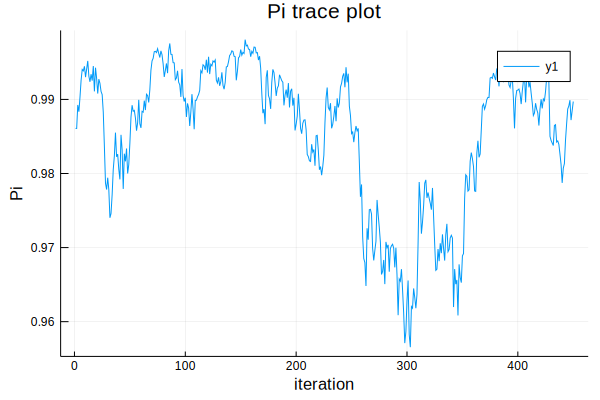

In [16]:
using Plots
x = Pi[!,1]; y = Pi[!,2]; # These are the plotting data
plot(x,y, title = "Pi trace plot",
        xlabel = "iteration", ylabel = "Pi")

In [17]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,ADFD
,Int64,Float64
1,1,0.441869
2,2,0.50393
3,3,0.479143
4,4,0.44565
5,5,0.434259
6,6,0.439989
7,7,0.438151
8,8,0.457909
9,9,0.402283


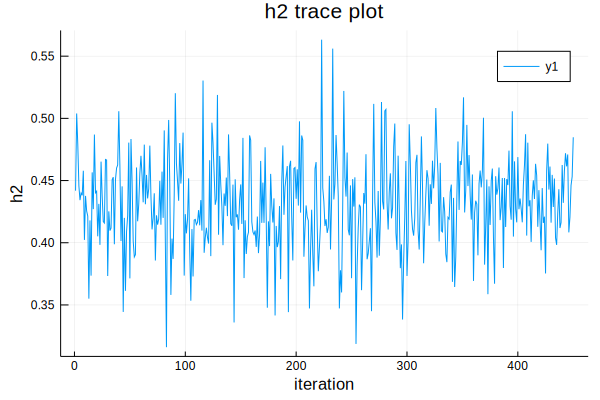

In [18]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [19]:
ADFD_model_equations = "ADFD = intercept + Batch + Died + EntryAge + FinPenBatch + SowID"
ADFD_R=47.8571
ADFD_model=build_model(ADFD_model_equations,ADFD_R);
set_covariate(ADFD_model,"EntryAge")
ADFD_G1=10.9833
set_random(ADFD_model,"FinPenBatch",ADFD_G1)
ADFD_G2=3.66847
set_random(ADFD_model,"SowID",ADFD_G2)
ADFD_G3=50.4406
@time add_genotypes(ADFD_model,M,ADFD_G3,header=false, rowID=rowID)
#@time add_genotypes(Nur2ADG_model,"Geno_JWAS_impute.txt",Nur2ADG_G3,separator=' ')

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
542.289601 seconds (870.69 k allocations: 20.848 GiB, 3.28% gc time)


In [ ]:
@time ADFD_outB=runMCMC(ADFD_model,phenotypes,methods="BayesB", missing_phenotypes=true, Pi=0.999, estimateScale=true, chain_length=50000,burnin = 5000,output_heritability=true,  output_samples_frequency=100)

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.
Phenotypes for all traits included in the model for individual 0058 in the row 54 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0065 in the row 59 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0086 in the row 80 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0098 in the row 89 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0101 in the row 91 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0110 in the row 100 are missing. This record is deleted.
Phenotypes for all traits included in the model for individual 0116 in the row 106 are missing. This record is deleted.
Phenotypes for all traits included in the model for individu

running MCMC for BayesB... 92%|███████████████████████  |  ETA: 0:50:49

In [23]:
marker=CSV.read("MCMC_samples_genetic_variance.txt",delim = ' ',header=true)
Va=mean(marker[!, 1])

36.323807564165485

In [25]:
Sow=CSV.read("MCMC_samples_SowID_variances.txt",delim = ' ',header=true)
Vs=mean(Sow[!, 1])

4.7971536358334035

In [27]:
pen=CSV.read("MCMC_samples_FinPenBatch_variances.txt",delim = ' ',header=true)
Vs=mean(pen[!, 1])

10.582078185624944

In [29]:
Res=CSV.read("MCMC_samples_residual_variance.txt",delim = ' ',header=true)
Ve=mean(Res[!, 1])

65.89317230943148

In [31]:
h2=Va/(Va+Vs+Ve)

0.32202225966368186

In [33]:
h2=CSV.read("MCMC_samples_heritability.txt",delim = ' ',header=true)
insertcols!(h2, 1, :iteration => 1:450) # Add a column called iteration

,iteration,ADFD
,Int64,Float64
1,1,0.384512
2,2,0.389071
3,3,0.365884
4,4,0.366243
5,5,0.348728
6,6,0.346497
7,7,0.401932
8,8,0.410144
9,9,0.344946


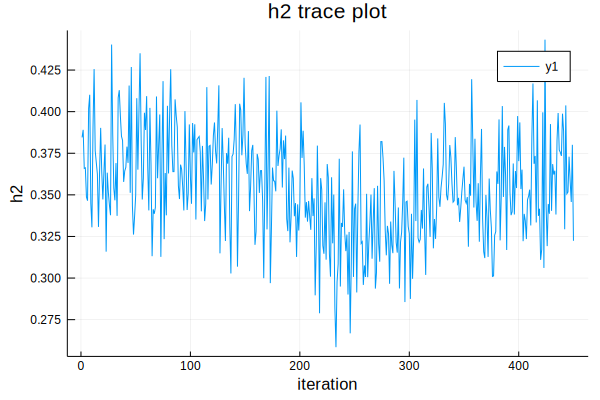

In [35]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [37]:
@time ADFD_outB,ADFD_winVarProps = GWAS("MCMC_samples_marker_effects_ADFD.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",ADFD_model;header=true,window_size="1 Mb",threshold=0.001,output_winVarProps=true)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.
1583.688644 seconds (613.19 M allocations: 4.613 TiB, 40.03% gc time)


(2398×10 DataFrame. Omitted printing of 4 columns
│ Row  │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │
│      │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │
├──────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┤
│ 1    │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │
│ 2    │ 2179   │ 17     │ 26000000  │ 27000000  │ 26002741  │ 26996510  │
│ 3    │ 539    │ 3      │ 111000000 │ 112000000 │ 111003857 │ 111998167 │
│ 4    │ 1005   │ 7      │ 37000000  │ 38000000  │ 37014607  │ 37997693  │
│ 5    │ 720    │ 5      │ 28000000  │ 29000000  │ 28008002  │ 28952896  │
│ 6    │ 1486   │ 11     │ 47000000  │ 48000000  │ 47001271  │ 47997707  │
│ 7    │ 1625   │ 13     │ 44000000  │ 45000000  │ 44002946  │ 44997535  │
│ 8    │ 1016   │ 7      │ 48000000  │ 49000000  │ 48002486  │ 48992096  │
│ 9    │ 2129   │ 16     │ 56000000  │ 57000000  │ 56003408  │ 56990639  │
│ 10   │ 938    │ 6      │ 141000000 │ 142000000 │

In [39]:
sort(ADFD_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,2206,17,53000000,54000000,53004264,53999484,254,1.78,0.851111
2,2179,17,26000000,27000000,26002741,26996510,267,1.76,0.806667
3,539,3,111000000,112000000,111003857,111998167,228,0.83,0.604444
4,720,5,28000000,29000000,28008002,28952896,213,0.7,0.562222
5,1625,13,44000000,45000000,44002946,44997535,213,0.53,0.462222
6,1005,7,37000000,38000000,37014607,37997693,202,0.51,0.566667
7,1888,14,98000000,99000000,98003202,98999414,244,0.51,0.415556
8,2129,16,56000000,57000000,56003408,56990639,220,0.5,0.433333
9,1486,11,47000000,48000000,47001271,47997707,243,0.48,0.473333


In [41]:
sum(ADFD_outB[!, 8])

96.67999999999998

In [42]:
CSV.write("MCMC_samples_1Mb_window_VarProps_ADFD.txt", ADFD_outB)

"MCMC_samples_1Mb_window_VarProps_ADFD.txt"

In [ ]:
#marker_effects = GWAS("MCMC_samples_marker_effects_FinADG.txt";header=true) # probability of inclusion

In [ ]:
#Nur2_ADG_outBPi = GWAS("MCMC_samples_marker_effects_Nur2ADG.txt",Nur2ADG_model;header=true,window_size=20,threshold=0.001,output_winVarProps=false)  # No map

In [ ]:
#using DelimitedFiles
#VL_winVarProps=readdlm("JWAS-WG/Haplotype/MCMC_samples_1MbwindowVarProps_Haplotype_WG-BayesB.txt", '\t',header=false)

In [ ]:
#res = VL_winVarProps .> 2/2400
#ppa = sum(res,dims=1)./450

In [ ]:
#ppa[1, [261 755 1352 2185]]

In [ ]:
#sort(vec(ppa))